   ### Implementation of :
            (i) Multilayer Perceptron (4 layers) 
            (ii) Non-Linear AutoRegressive with eXogenous inputs)  (4 Layers)
            (iii) Elman RNN
            (iv)  Jordan RNN

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from pylab import plot, legend, subplot, grid, xlabel, ylabel, show, title
from pyneurgen.neuralnet import NeuralNet
from pyneurgen.nodes import BiasNode, Connection
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("dataset.csv",index_col=False, parse_dates=[['day','month','year','hour']])
df.shape[:]

(43824, 10)

In [3]:
df.head()

day_month_year_hour  No  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0          1 1 2010 0   1    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1          1 1 2010 1   2    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2          1 1 2010 2   3    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3          1 1 2010 3   4    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4          1 1 2010 4   5    NaN   -20 -12.0  1018.0   NW  12.97   0   0

In [4]:
df['day_month_year_hour'] = pd.to_datetime(df.day_month_year_hour , format = '%d %m %Y %H')
data = df.drop(['day_month_year_hour'], axis=1)
data.index = df.day_month_year_hour
data = data.drop(['No'],axis=1)

In [5]:
data.head()

pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
day_month_year_hour                                               
2010-01-01 00:00:00    NaN   -21 -11.0  1021.0   NW   1.79   0   0
2010-01-01 01:00:00    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2010-01-01 02:00:00    NaN   -21 -11.0  1019.0   NW   6.71   0   0
2010-01-01 03:00:00    NaN   -21 -14.0  1019.0   NW   9.84   0   0
2010-01-01 04:00:00    NaN   -20 -12.0  1018.0   NW  12.97   0   0

In [6]:
data = data.fillna(method='bfill')

In [7]:
data = data.drop(['DEWP','TEMP','cbwd','Iws','Ir'],axis=1)
data.head(n=5)

pm2.5    PRES  Is
day_month_year_hour                   
2010-01-01 00:00:00  129.0  1021.0   0
2010-01-01 01:00:00  129.0  1020.0   0
2010-01-01 02:00:00  129.0  1019.0   0
2010-01-01 03:00:00  129.0  1019.0   0
2010-01-01 04:00:00  129.0  1018.0   0

In [8]:
data.values[:,1:]

array([[1021.,    0.],
       [1020.,    0.],
       [1019.,    0.],
       ...,
       [1034.,    0.],
       [1034.,    0.],
       [1034.,    0.]])

In [9]:
data.values[:,0]

array([129., 129., 129., ...,  10.,   8.,  12.])

In [10]:
# data['PRES']=pd.DataFrame(data['PRES'].values/np.max(data['PRES'].values))
# data['Is']=pd.DataFrame(data['Is'].values/np.max(data['Is'].values))
all_inputs = pd.DataFrame(data.values[:,1:])
all_targets = pd.DataFrame(data.values[:,0]) 

In [11]:
all_inputs[0] = all_inputs[0]/all_inputs[0].max()
all_inputs[1] = all_inputs[1]/all_inputs[1].max()
all_inputs.head(n=5)

0    1
0  0.976099  0.0
1  0.975143  0.0
2  0.974187  0.0
3  0.974187  0.0
4  0.973231  0.0

In [12]:
all_targets[0] = all_targets[0]/all_targets[0].max()
all_targets.head(n=5)

0
0  0.129779
1  0.129779
2  0.129779
3  0.129779
4  0.129779

In [13]:
print(all_inputs.shape[:])
print(all_targets.shape[:])
print(all_inputs.dtypes)

(43824, 2)
(43824, 1)
0    float64
1    float64
dtype: object


# Simple ANN

In [14]:
net = NeuralNet()
net.init_layers(5, [2], 1)


net.randomize_network()
net.set_halt_on_extremes(True)

#   Set to constrain beginning weights to -.5 to .5
#       Just to show we can
net.set_random_constraint(.5)
net.set_learnrate(.2)

In [15]:
net.set_all_inputs(all_inputs.values)
net.set_all_targets(all_targets.values)


In [16]:
length = len(all_inputs)
learn_end_point = int(length * 0.8)

net.set_learn_range(0, learn_end_point)
net.set_test_range(learn_end_point + 1, length - 1)

In [17]:
net.layers[1].set_activation_type('tanh')

In [18]:
net.learn(epochs=10, show_epoch_results=True,random_testing=False)

epoch: 0 MSE: 0.00046082207871235093
epoch: 1 MSE: 0.0005357694972041735
epoch: 2 MSE: 0.0005673899567928736
epoch: 3 MSE: 0.0006134205690520451
epoch: 4 MSE: 0.0007269267215504429
epoch: 5 MSE: 0.000882616292629167
epoch: 6 MSE: 0.0009022626484207785
epoch: 7 MSE: 0.0009024362543382637
epoch: 8 MSE: 0.0009024370654110223
epoch: 9 MSE: 0.0009024369613411748


In [19]:
mse = net.test()

In [20]:
np.sqrt(mse)

0.08273409336161547

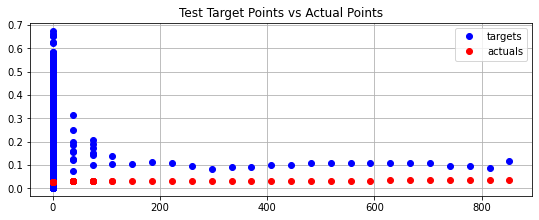

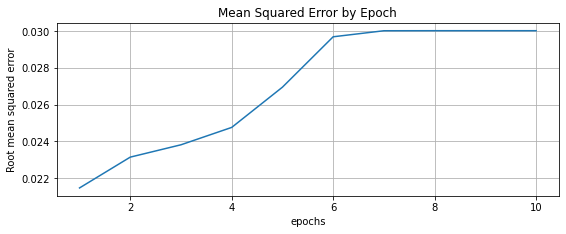

In [21]:
test_positions = [item[0][1] * 1000.0 for item in net.get_test_data()]

all_targets1 = [item[0][0] for item in net.test_targets_activations]
allactuals = [item[1][0] for item in net.test_targets_activations]
plt.figure(figsize=(9,7))
subplot(2, 1, 1)
plot(test_positions, all_targets1, 'bo', label='targets')
plot(test_positions, allactuals, 'ro', label='actuals')
grid(True)
legend(loc='upper right', numpoints=1)
title("Test Target Points vs Actual Points")
show()

plt.figure(figsize=(9,7))
subplot(2, 1, 2)
plot(range(1, len(net.accum_mse) + 1, 1), np.sqrt(net.accum_mse))
xlabel('epochs')
ylabel('Root mean squared error')
grid(True)
title("Mean Squared Error by Epoch")

show()

#   NARX Recurrent Networks

In [22]:
from pyneurgen.recurrent import NARXRecurrent
input_nodes = 10
hidden_nodes = 4
output_nodes = 1

output_order = 3
incoming_weight_from_output = .6
input_order = 2
incoming_weight_from_input = .4

net = NeuralNet()
net.init_layers(input_nodes, [hidden_nodes], output_nodes,
        NARXRecurrent(
            output_order,
            incoming_weight_from_output,
            input_order,
            incoming_weight_from_input))

net.randomize_network()

In [23]:
net.set_all_inputs(all_inputs.values)
net.set_all_targets(all_targets.values)


In [40]:
all_inputs.values[0]

array([0.97609943, 0.        ])

In [24]:
net.set_learnrate(.1)

In [25]:
length = len(all_inputs)
learn_end_point = int(length * 0.8)

net.set_learn_range(0, learn_end_point)
net.set_test_range(learn_end_point + 1, length - 1)

In [26]:
net.layers[1].set_activation_type('tanh')

In [27]:
net.learn(epochs=10, show_epoch_results=True,random_testing=False)

epoch: 0 MSE: 0.0007141522805779323
epoch: 1 MSE: 0.0007711251891276557
epoch: 2 MSE: 0.0008923230245361644
epoch: 3 MSE: 0.0009718113333161262
epoch: 4 MSE: 0.0010363691751873376
epoch: 5 MSE: 0.0011235356143582118
epoch: 6 MSE: 0.001194978445172155
epoch: 7 MSE: 0.0012533061704039265
epoch: 8 MSE: 0.0013038978155727097
epoch: 9 MSE: 0.0013483170290680348


In [28]:
mse = net.test()

In [29]:
np.sqrt(mse)

0.07688104245264268

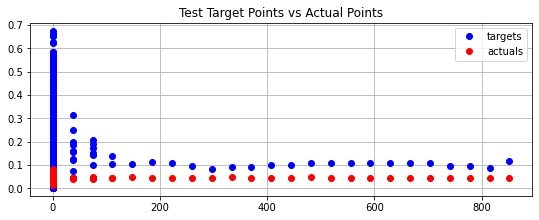

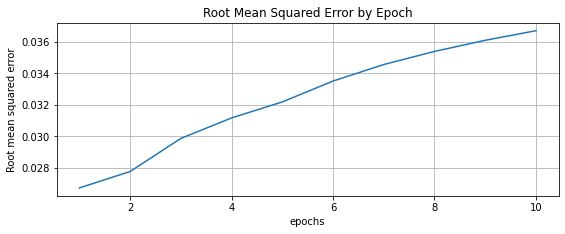

In [30]:
test_positions = [item[0][1] * 1000.0 for item in net.get_test_data()]

all_targets1 = [item[0][0] for item in net.test_targets_activations]
allactuals = [item[1][0] for item in net.test_targets_activations]
plt.figure(figsize=(9,7))
subplot(2, 1, 1)
plot(test_positions, all_targets1, 'bo', label='targets')
plot(test_positions, allactuals, 'ro', label='actuals')
grid(True)
legend(loc='upper right', numpoints=1)
title("Test Target Points vs Actual Points")
show()

plt.figure(figsize=(9,7))
subplot(2, 1, 2)
plot(range(1, len(net.accum_mse) + 1, 1), np.sqrt(net.accum_mse))
xlabel('epochs')
ylabel('Root mean squared error')
grid(True)
title("Root Mean Squared Error by Epoch")

show()

# Elman Simple Recurrent Network 

In [31]:
from pyneurgen.recurrent import ElmanSimpleRecurrent 
input_nodes = 10
hidden_nodes = 4
output_nodes = 1

net = NeuralNet()
net.init_layers(
    input_nodes,
    [hidden_nodes],
    output_nodes,
    ElmanSimpleRecurrent())

net.randomize_network()

In [32]:
net.set_all_inputs(all_inputs.values)
net.set_all_targets(all_targets.values)

In [33]:
net.set_learnrate(.1)

In [34]:
length = len(all_inputs)
learn_end_point = int(length * 0.8)

net.set_learn_range(0, learn_end_point)
net.set_test_range(learn_end_point + 1, length - 1)

In [35]:
net.layers[1].set_activation_type('tanh')

In [36]:
net.learn(epochs=10, show_epoch_results=True,random_testing=False)

epoch: 0 MSE: 0.001032707698947476
epoch: 1 MSE: 0.0009614681402093582
epoch: 2 MSE: 0.0010131223272458792
epoch: 3 MSE: 0.0010727659875394322
epoch: 4 MSE: 0.0011352717733467263
epoch: 5 MSE: 0.001214178943441632
epoch: 6 MSE: 0.0012638348152593285
epoch: 7 MSE: 0.0013381910001298762
epoch: 8 MSE: 0.0013687101587193332
epoch: 9 MSE: 0.0013809303796842743


In [ ]:
mse = net.test()

In [228]:
np.sqrt(mse)

0.08135182913850295

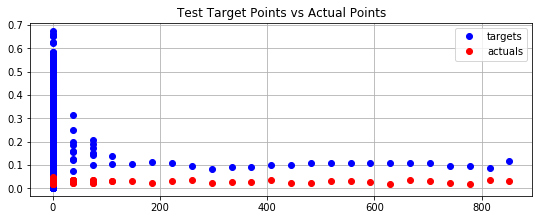

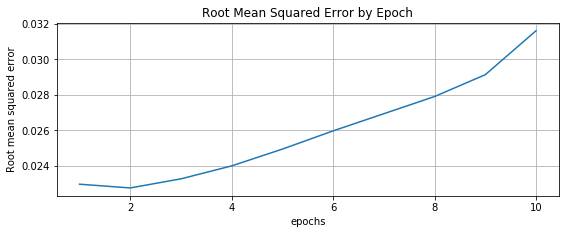

In [229]:
test_positions = [item[0][1] * 1000.0 for item in net.get_test_data()]

all_targets1 = [item[0][0] for item in net.test_targets_activations]
allactuals = [item[1][0] for item in net.test_targets_activations]
plt.figure(figsize=(9,7))
subplot(2, 1, 1)
plot(test_positions, all_targets1, 'bo', label='targets')
plot(test_positions, allactuals, 'ro', label='actuals')
grid(True)
legend(loc='upper right', numpoints=1)
title("Test Target Points vs Actual Points")
show()

plt.figure(figsize=(9,7))
subplot(2, 1, 2)
plot(range(1, len(net.accum_mse) + 1, 1), np.sqrt(net.accum_mse))
xlabel('epochs')
ylabel('Root mean squared error')
grid(True)
title("Root Mean Squared Error by Epoch")

show()

#   Jordan Style Recurrent Network

In [236]:
from pyneurgen.recurrent import JordanRecurrent

input_nodes = 2
hidden_nodes = 2
output_nodes = 1
existing_weight_factor = .7
net = NeuralNet()

net.init_layers(
    input_nodes,
    [hidden_nodes],
    output_nodes,
    JordanRecurrent(existing_weight_factor))

net.randomize_network()

In [237]:
net.set_all_inputs(all_inputs.values)
net.set_all_targets(all_targets.values)

In [238]:
net.set_learnrate(.1)

In [239]:
length = len(all_inputs)
learn_end_point = int(length * 0.8)

net.set_learn_range(0, learn_end_point)
net.set_test_range(learn_end_point + 1, length - 1)

In [240]:
net.layers[1].set_activation_type('tanh')

In [241]:
net.learn(epochs=10, show_epoch_results=True,random_testing=False)

epoch: 0 MSE: 0.0011327074190023868
epoch: 1 MSE: 0.0015343302216213734
epoch: 2 MSE: 0.0016810413701665897
epoch: 3 MSE: 0.0018143277774055853
epoch: 4 MSE: 0.001981917878630827
epoch: 5 MSE: 0.002106651779971453
epoch: 6 MSE: 0.0021963685077640085
epoch: 7 MSE: 0.0022926350961018733
epoch: 8 MSE: 0.0023628475949821937
epoch: 9 MSE: 0.0023617075879759824


In [242]:
mse = net.test()

In [244]:
np.sqrt(mse)

0.07539706491057728

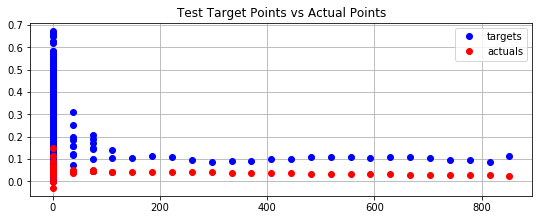

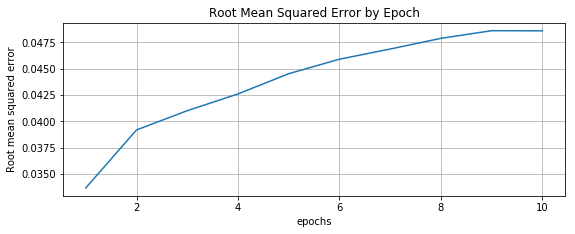

In [245]:
test_positions = [item[0][1] * 1000.0 for item in net.get_test_data()]

all_targets1 = [item[0][0] for item in net.test_targets_activations]
allactuals = [item[1][0] for item in net.test_targets_activations]
plt.figure(figsize=(9,7))
subplot(2, 1, 1)
plot(test_positions, all_targets1, 'bo', label='targets')
plot(test_positions, allactuals, 'ro', label='actuals')
grid(True)
legend(loc='upper right', numpoints=1)
title("Test Target Points vs Actual Points")
show()

plt.figure(figsize=(9,7))
subplot(2, 1, 2)
plot(range(1, len(net.accum_mse) + 1, 1), np.sqrt(net.accum_mse))
xlabel('epochs')
ylabel('Root mean squared error')
grid(True)
title("Root Mean Squared Error by Epoch")

show()